Strategies: 3. Formulae:3041


/Users/enniovisco/source/repos/distributed-monitor/preparation.ipynb:66: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  ],


Datasets: 8. Strategies: 3. Single dataset Formulae:3073


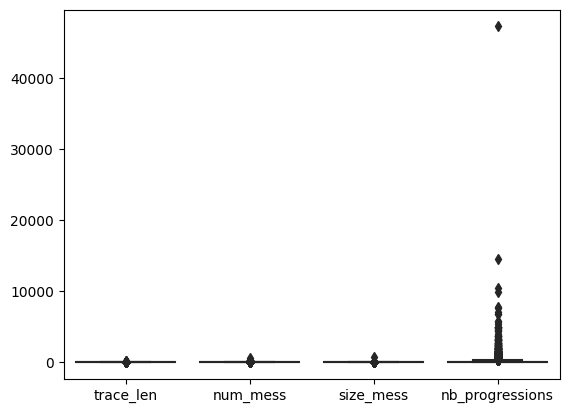

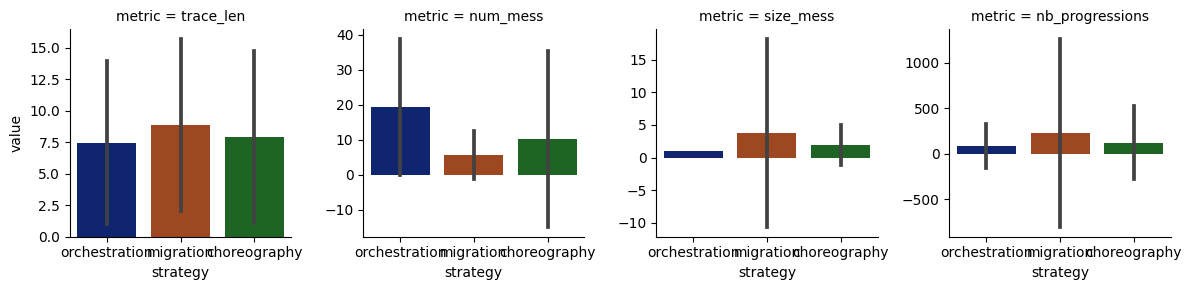

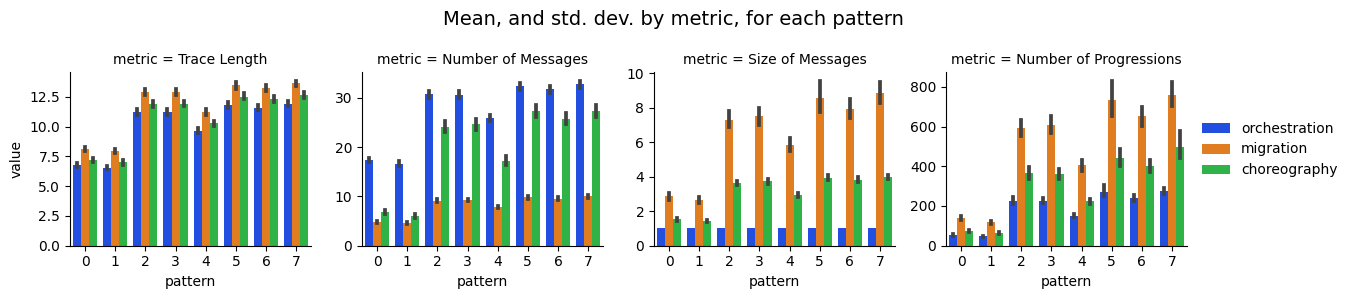

In [1]:
# noinspection PyUnresolvedReferences
from ipynb.fs.full.learning import final_df
# noinspection PyUnresolvedReferences
from ipynb.fs.full.preparation import strategies_ddf, f_ops

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# helper
cent = strategies_ddf[0] # dataset for centralized strategy

## Stats

Formula Duplication rate:

In [4]:
(len(cent['formula'].values) - len(cent['formula'].value_counts())) / len(cent['formula'].values)

0.6441959881617889

Encoding Duplication rate:

In [5]:
(len(f_ops) - len(f_ops.drop_duplicates())) / len(f_ops)

0.8813986627205963

General dataset stats

In [6]:
cent.groupby(['formula']).describe().sort_values(by=('formula_id', 'count'), ascending=False)

formula_id               \
                                                        count         mean   
formula                                                                      
 Next (Var "a")                                         185.0   477.913514   
 Next (Var "b")                                         156.0   494.878205   
 Next (Var "c")                                         137.0   488.547445   
 Glob (Var "b")                                         114.0   849.780702   
 Glob (Var "a")                                         114.0   735.666667   
...                                                       ...          ...   
 Ev (And (Var "a", Neg (Until (Var "a", Var "b"...        1.0  2678.000000   
 Ev (And (Var "a", Next (Var "c")))                       1.0  2082.000000   
 Ev (And (Var "a", Or (Neg (Var "a"), Neg (Var ...        1.0  2048.000000   
 Ev (And (Var "a", Until (Var "a", Var "b")))             1.0  2033.000000   
 Glob (Or (Or (Var "b", Var "c"), Next (Var "c"...        1.0  2094.000000   

                                                                        \
                                                           std     min   
formula                                                                  
 Next (Var "a")                                     304.055099     2.0   
 Next (Var "b")                                     295.875570     0.0   
 Next (Var "c")                                     302.508118     1.0   
 Glob (Var "b")                                     562.617803     4.0   
 Glob (Var "a")                                     526.710323    39.0   
...                                                        ...     ...   
 Ev (And (Var "a", Neg (Until (Var "a", Var "b"...         NaN  2678.0   
 Ev (And (Var "a", Next (Var "c")))                        NaN  2082.0   
 Ev (And (Var "a", Or (Neg (Var "a"), Neg (Var ...         NaN  2048.0   
 Ev (And (Var "a", Until (Var "a", Var "b")))              NaN  2033.0   
 Glob (Or (Or (Var "b", Var "c"), Next (Var "c"...         NaN  2094.0   

                                                                              \
                                                        25%     50%      75%   
formula                                                                        
 Next (Var "a")                                      212.00   481.0   714.00   
 Next (Var "b")                                      229.75   499.0   766.25   
 Next (Var "c")                                      182.00   493.0   766.00   
 Glob (Var "b")                                      415.00   746.0  1213.50   
 Glob (Var "a")                                      334.50   647.0   967.50   
...                                                     ...     ...      ...   
 Ev (And (Var "a", Neg (Until (Var "a", Var "b"...  2678.00  2678.0  2678.00   
 Ev (And (Var "a", Next (Var "c")))                 2082.00  2082.0  2082.00   
 Ev (And (Var "a", Or (Neg (Var "a"), Neg (Var ...  2048.00  2048.0  2048.00   
 Ev (And (Var "a", Until (Var "a", Var "b")))       2033.00  2033.0  2033.00   
 Glob (Or (Or (Var "b", Var "c"), Next (Var "c"...  2094.00  2094.0  2094.00   

                                                                x            \
                                                       max  count      mean   
formula                                                                       
 Next (Var "a")                                      995.0  185.0  1.000000   
 Next (Var "b")                                      997.0  156.0  1.000000   
 Next (Var "c")                                      985.0  137.0  1.000000   
 Glob (Var "b")                                     2387.0  114.0  1.359649   
 Glob (Var "a")                                     2866.0  114.0  1.236842   
...                                                    ...    ...       ...   
 Ev (And (Var "a", Neg (Until (Var "a", Var "b"...  2678.0    1.0  4.000000   
 Ev (And (

## PCA

In [7]:
# Separating out the features
x = final_df.loc[:, final_df.columns != 'strategy_id'].values
# Separating out the target
y = final_df.loc[:,['strategy_id']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[-1.73148133, -1.10565447, -0.90438303, ...,  0.01813691,
         0.01813691,  0.        ],
       [-1.7303422 , -1.10565447, -0.90438303, ...,  0.01813691,
         0.01813691,  0.        ],
       [-1.72920307, -1.10565447, -0.90438303, ...,  0.01813691,
         0.01813691,  0.        ],
       ...,
       [ 1.72920307,  2.70215441,  2.06471799, ...,  0.01813691,
         0.01813691,  0.        ],
       [ 1.7303422 ,  2.70215441,  2.51008314, ...,  0.01813691,
         0.01813691,  0.        ],
       [ 1.73148133,  2.70215441,  4.58845385, ...,  0.01813691,
         0.01813691,  0.        ]])

In [8]:
principal_components = ['pc 1', 'pc 2']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = principal_components)

In [9]:
finalDf = pd.concat([principalDf, final_df[['strategy_id']]], axis = 1)
finalDf

,pc 1,pc 2,strategy_id
0,-0.205334,-0.393776,2
1,-0.205450,-0.395478,2
2,-0.205204,-0.391976,2
3,-0.205440,-0.395413,2
4,-0.209966,-0.417794,2
...,...,...,...
9118,0.198797,0.789949,0
9119,-0.027938,2.228071,0
9120,-0.152705,0.130612,0
9121,-0.135159,0.144495,0


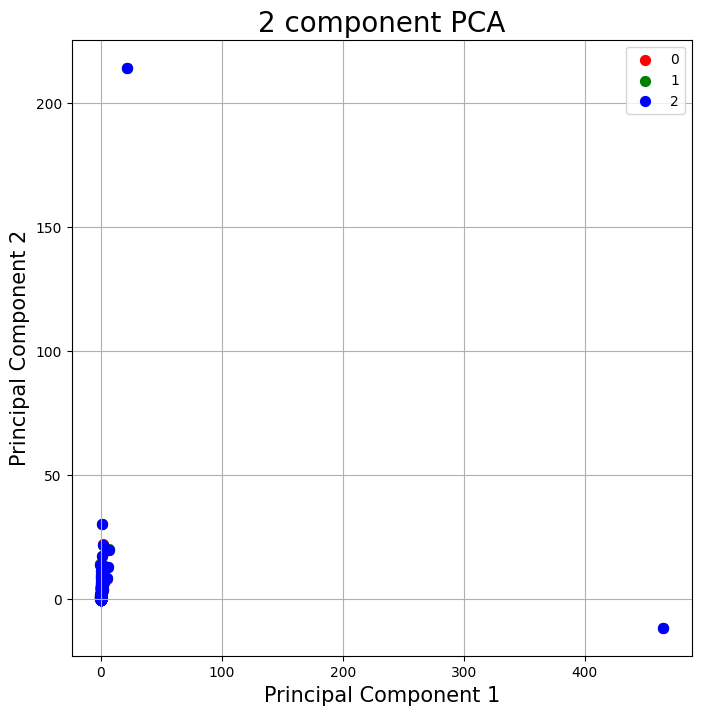

In [10]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['strategy_id'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc 1']
               , finalDf.loc[indicesToKeep, 'pc 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Relative difference

In [11]:
from decmon.plotter import *
from decmon.constants import *

Datasets: 8. Strategies: 3. Single dataset Formulae:4221
Datasets: 8. Strategies: 3. Single dataset Formulae:5111
Datasets: 8. Strategies: 3. Single dataset Formulae:5072


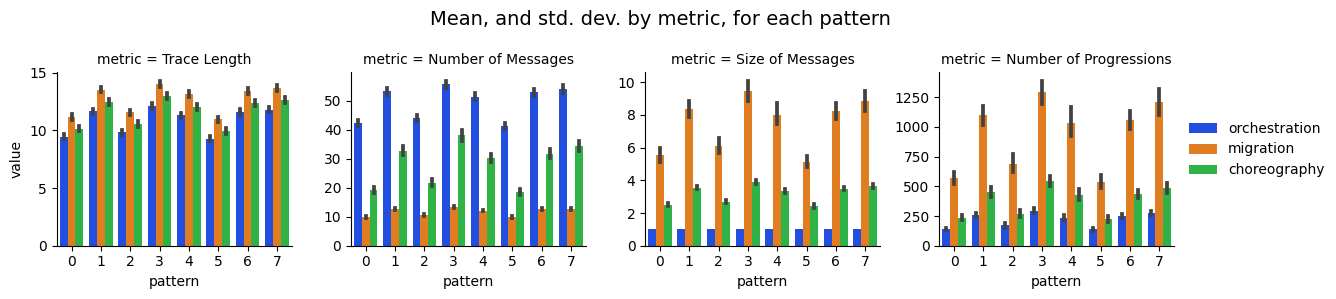

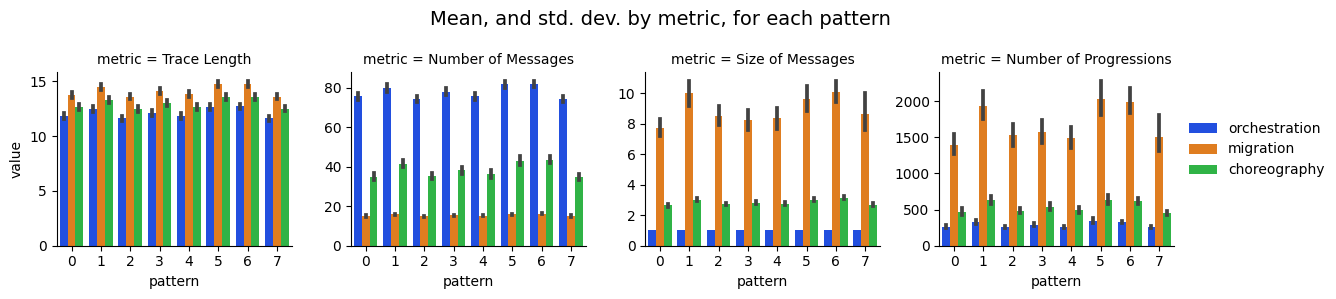

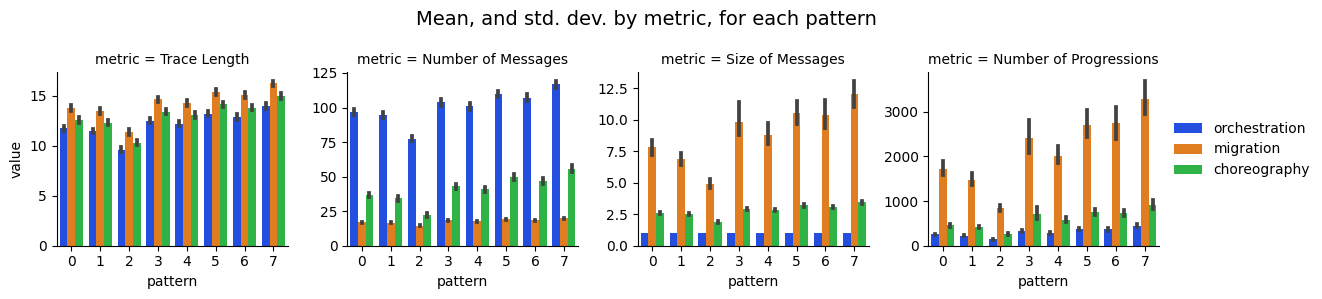

In [12]:
# noinspection PyUnresolvedReferences
import ipynb.fs.full.full_data_3 as system_3
# noinspection PyUnresolvedReferences
import ipynb.fs.full.full_data_5 as system_5
# noinspection PyUnresolvedReferences
import ipynb.fs.full.full_data_7 as system_7
# noinspection PyUnresolvedReferences
import ipynb.fs.full.full_data_9 as system_9

In [13]:
def prepare_df(dfs: [pd.DataFrame], metric: str, nodes: int) -> pd.DataFrame:
    new_df = pd.concat(dfs)
    new_df = new_df[new_df['metric'] == metric]
    new_df['nodes'] = nodes
    return new_df

def prepare_chart(ddfs: [[pd.DataFrame]], metric: str, nodes: [int]) -> pd.DataFrame:
    final_dfs = [prepare_df(ddfs[i], metric, nodes[i]) for i in range(0, len(ddfs))]
    return pd.concat(final_dfs)

In [21]:
datasets = [
    system_3.merged_metrics_dfp,
    system_5.merged_metrics_dfp,
    system_7.merged_metrics_dfp,
    system_9.merged_metrics_dfp
]

nodes = [3, 5, 7, 9]

In [22]:
mdf = [prepare_chart(datasets, i, nodes) for i in METRICS.keys()]
metrics = list(METRICS.values())

<AxesSubplot:title={'center':'Metric: Trace Length'}, xlabel='nodes', ylabel='value'>

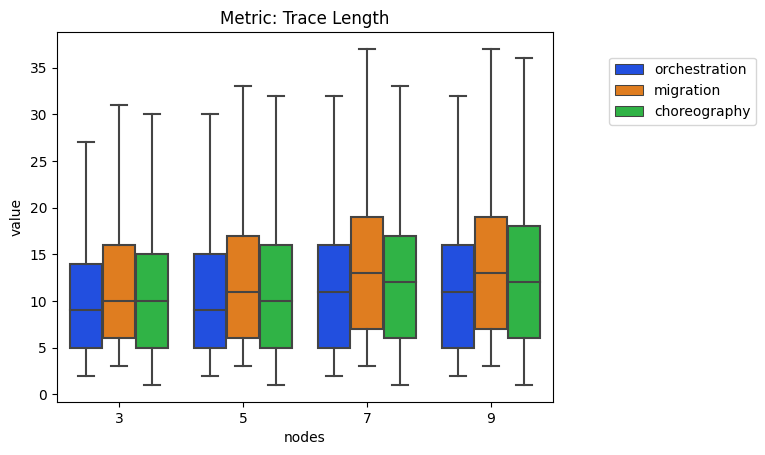

In [23]:
metric_id = 0
plot = plot_metrics_by_components(mdf[metric_id], metrics[metric_id])
plot.figure.savefig(f"output/metric_{metric_id}.png", bbox_inches='tight')
plot

<AxesSubplot:title={'center':'Metric: Number of Messages'}, xlabel='nodes', ylabel='value'>

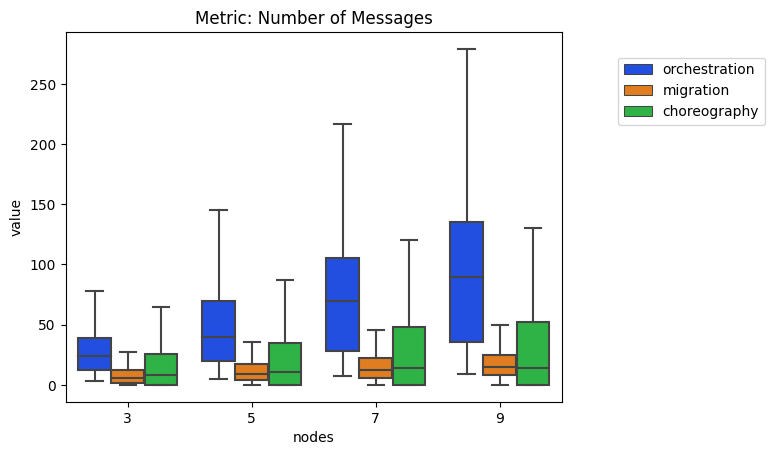

In [24]:
metric_id = 1
plot = plot_metrics_by_components(mdf[metric_id], metrics[metric_id])
plot.figure.savefig(f"output/metric_{metric_id}.png", bbox_inches='tight')
plot

<AxesSubplot:title={'center':'Metric: Size of Messages'}, xlabel='nodes', ylabel='value'>

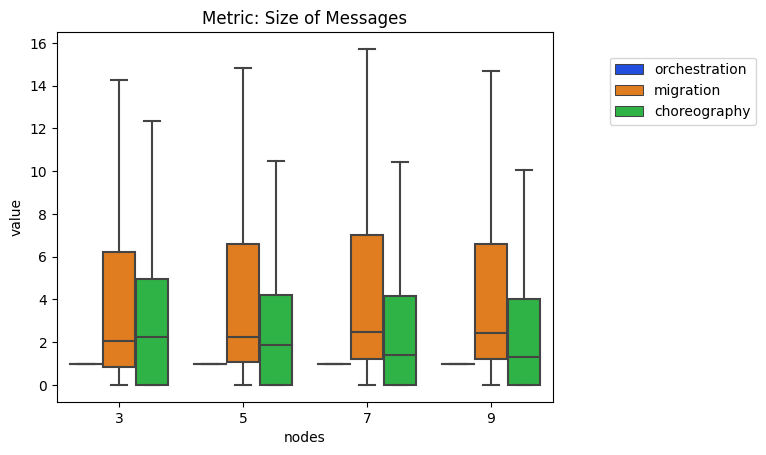

In [25]:
metric_id = 2
plot = plot_metrics_by_components(mdf[metric_id], metrics[metric_id])
plot.figure.savefig(f"output/metric_{metric_id}.png", bbox_inches='tight')
plot

<AxesSubplot:title={'center':'Metric: Number of Progressions'}, xlabel='nodes', ylabel='value'>

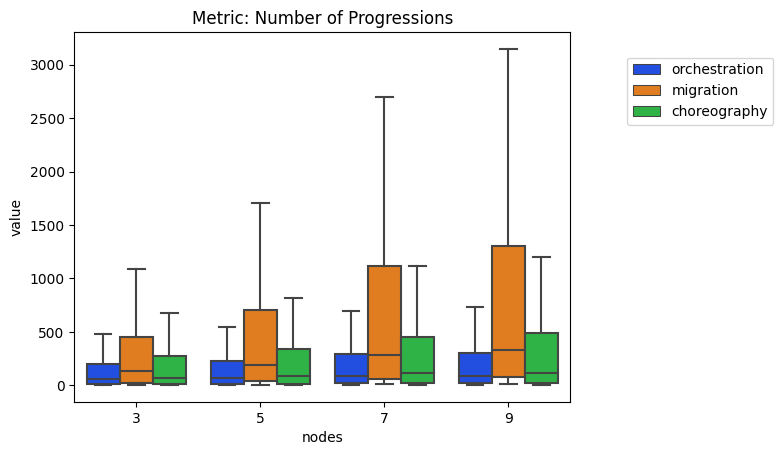

In [26]:
metric_id = 3
plot = plot_metrics_by_components(mdf[metric_id], metrics[metric_id])
plot.figure.savefig(f"output/metric_{metric_id}.png", bbox_inches='tight')
plot